# 决策树的应用——鸢（yuān）尾花数据集特征

![iris](image/iris.png)

**数据集**: [dateset/Isris.csv](dateset/Isris.csv)

**样本数**: 150 (3类，每类50个样本)    

**属性（特征）数**: 4 个数值型, 1个类别属性
1. sepal length in cm  萼片长度
2. sepal idth in cm  萼片宽度
3. petal length in cm  花瓣长度
4. petal width in cm  花瓣宽度  

**类别**：（1）Iris-Setosa（2）Iris-Versicolour（3）Iris-Virginica  


著名的Iris数据库，由Fisher爵士最先使用，他从费舍尔的论文获取的数据集。

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.

## 1）加载数据

In [1]:
EN_CN_dict = {"sepal length (cm)": "萼片长度",
              "sepal width (cm)": "萼片宽度",
              "petal length (cm)": "花瓣长度",
              "petal width (cm)": "花瓣宽度",
              "label":"类别"}

In [2]:
import pandas as pd
df = pd.read_csv('datasets/Iris.csv')
df.columns = [EN_CN_dict[i] for i in df.columns]
df.head()

,萼片长度,萼片宽度,花瓣长度,花瓣宽度,类别
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


将字符型的类别'类别'通过整数编码，替换成[0, 1, 2]或者不替换也可以。

In [3]:
df['类别']=df['类别'].map({'setosa': '山鸢尾', 'versicolor': '变色鸢尾', 'virginica': '维吉尼亚鸢尾'})
df.head()

,萼片长度,萼片宽度,花瓣长度,花瓣宽度,类别
0,5.1,3.5,1.4,0.2,山鸢尾
1,4.9,3.0,1.4,0.2,山鸢尾
2,4.7,3.2,1.3,0.2,山鸢尾
3,4.6,3.1,1.5,0.2,山鸢尾
4,5.0,3.6,1.4,0.2,山鸢尾


## 2）数据标准化处理

In [4]:
X = df[["萼片长度", "萼片宽度", "花瓣长度", "花瓣宽度"]]
X = (X - X.mean())/X.std()

In [5]:
y = df['类别']

## 3）构建聚类模型并训练

In [6]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=5)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=5)

In [7]:
predicted_y = tree_clf.predict(X)

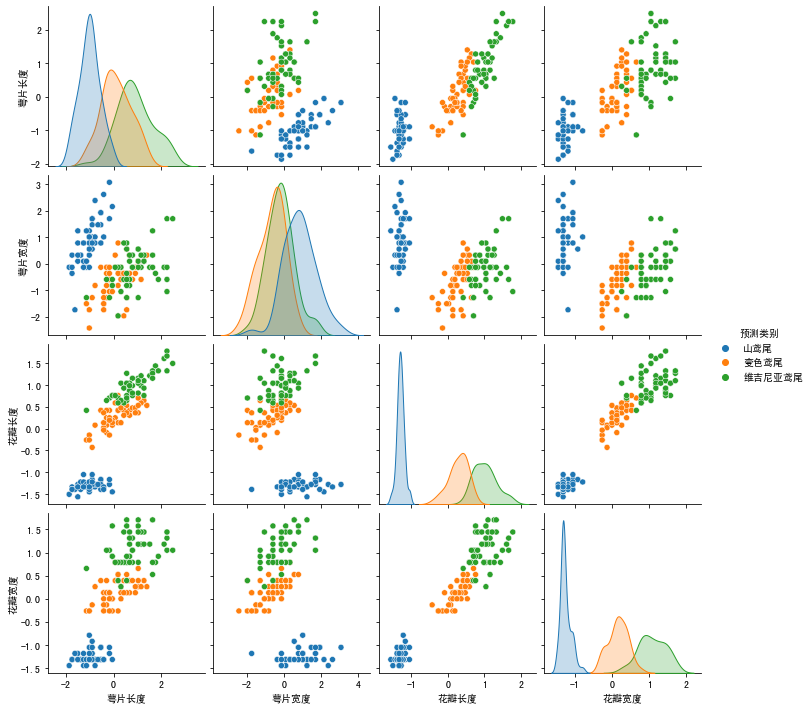

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常

import seaborn as sns
df2 = pd.DataFrame(X.values, columns=X.columns.values)
df2['预测类别'] = predicted_y
p = sns.pairplot(df2, hue="预测类别")

## 4）模型评价

In [9]:
tree_clf.score(X, y)

1.0

## 5）绘制决策树

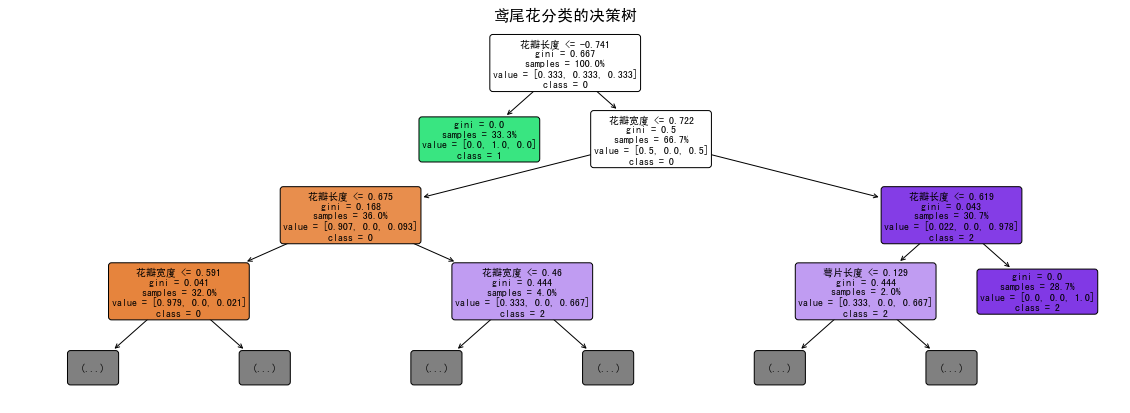

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,7))
plot_tree(tree_clf,
          max_depth=3,
          feature_names=X.columns.values[:4],
          class_names=['0', '1', '2'],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)
plt.title("鸢尾花分类的决策树", fontsize=16)
plt.show()

> 模型小知识：白盒与黑盒  
正如我们看到的一样，决策树非常直观，他们的决定很容易被解释。这种模型通常被称为白盒模型。相反，随机森林或神经网络通常被认为是黑盒模型。他们能做出很好的预测，并且您可以轻松检查它们做出这些预测过程中计算的执行过程。然而，人们通常很难用简单的术语来解释为什么模型会做出这样的预测。例如，如果一个神经网络说一个特定的人出现在图片上，我们很难知道究竟是什么导致了这一个预测的出现：  
模型是否认出了那个人的眼睛？ 她的嘴？ 她的鼻子？她的鞋？或者是否坐在沙发上？ 相反，决策树提供良好的、简单的分类规则，甚至可以根据需要手动操作（例如鸢尾花分类）。